<a href="https://colab.research.google.com/github/syahrinalfi/MachineLearningTasks/blob/main/2ndWeekTasks/2_Polynomial_Regression_realtor_data_zip_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Muhammad Alfi Syahrin
* NIM : 1103213144
* Lecture : 2
* Model : Polynomial Regression
* Dataset : realtor-data.zip.csv (https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset)
* Prompt ChatGPT yang digunakan : https://chat.openai.com/share/ee2a069f-a5fc-48b2-8e2e-8bcd67e2597a


In [ ]:
# 1.Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# 2.Load Dataset
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Minggu 2/realtor-data.zip.csv").sample(n=3000, random_state=42) #Load 1000 data random

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 3.Informasi Dataset
data.info()
data.describe()
data.corr() # Melihat korelasi antar kolom numerik

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 720168 to 776061
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          3000 non-null   object 
 1   bed             2554 non-null   float64
 2   bath            2520 non-null   float64
 3   acre_lot        2333 non-null   float64
 4   city            3000 non-null   object 
 5   state           3000 non-null   object 
 6   zip_code        2999 non-null   float64
 7   house_size      2190 non-null   float64
 8   prev_sold_date  1635 non-null   object 
 9   price           2999 non-null   float64
dtypes: float64(6), object(4)
memory usage: 257.8+ KB


<ipython-input-24-ee543e74a3cd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() # Melihat korelasi antar kolom numerik


,bed,bath,acre_lot,zip_code,house_size,price
bed,1.000000,0.666676,-0.008169,-0.031067,0.123011,0.195958
bath,0.666676,1.000000,-0.027608,0.004901,0.156967,0.428059
acre_lot,-0.008169,-0.027608,1.000000,-0.006608,-0.001628,-0.001653
zip_code,-0.031067,0.004901,-0.006608,1.000000,-0.007474,-0.073905
house_size,0.123011,0.156967,-0.001628,-0.007474,1.000000,0.092643
price,0.195958,0.428059,-0.001653,-0.073905,0.092643,1.000000


In [ ]:
# 4.Pemisahan Data
num = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
X = data[data['status'] == 'for_sale']
X = X[num].dropna(axis = 0) # Fitur
y = X['price'] # Target
X = X.drop(columns=['price'])


In [ ]:
# 5.Pembuatan Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
# 6.Evaluasi Model
y_pred = model.predict(X_test_poly)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r_squared = r2_score(y_test, y_pred)

# Cetak hasil evaluasi
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("R-squared:", r_squared)

RMSE: 891911.1699588428
MAE: 356449.4264898747
MAPE: 101.57376067813158
R-squared: -0.00016238099852605714


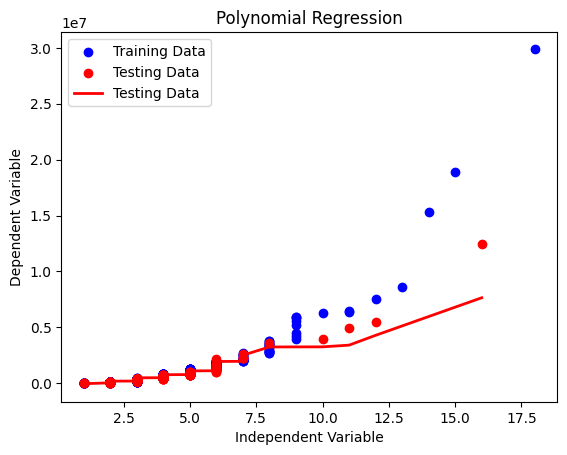

In [ ]:
# Visualisasi data pelatihan
plt.scatter(sorted(X_train.iloc[:, 0]), sorted(y_train), color='blue', label='Training Data')

# Visualisasi data pengujian
plt.scatter(sorted(X_test.iloc[:, 0]), sorted(y_test), color='red', label='Testing Data')

# Visualisasi garis regresi
plt.plot(sorted(X_test.iloc[:, 0]), sorted(y_pred), linewidth=2, color='red', label='Testing Data')

plt.title('Polynomial Regression')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()

In [ ]:
# Baca 10 data baru secara acak dari file CSV untuk pengetesan lagi
data_tes_baru_random = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Minggu 2/realtor-data.zip.csv").sample(n=10, random_state=42)

# Lakukan preprocessing yang sama dengan data latih
data_tes_baru_encoded = pd.get_dummies(data_tes_baru_random).dropna(axis=0)

# Pisahkan fitur dan target
X_tes_baru = data_tes_baru_encoded[num].dropna(axis=0)
y_tes_baru = X_tes_baru['price']
X_tes_baru = X_tes_baru.drop(columns=['price'])

# Transformasi fitur jika diperlukan
X_tes_baru_poly = poly_features.transform(X_tes_baru)  # Jika menggunakan transformasi polinomial yang sama

# Lakukan prediksi menggunakan model
prediksi_tes_baru = model.predict(X_tes_baru_poly)

# Tampilkan hasil prediksi
# Buat DataFrame baru untuk menyimpan harga asli dan hasil prediksi
hasil_prediksi_df = pd.DataFrame({'Harga Asli': y_tes_baru.values, 'Prediksi Harga': prediksi_tes_baru})

# Tampilkan DataFrame hasil prediksi
print(hasil_prediksi_df)


   Harga Asli  Prediksi Harga
0    209900.0    4.498231e+05
1   6495000.0    1.202702e+06
2    160000.0    1.684179e+05
3    364900.0    7.336845e+05
4    645000.0    7.749346e+05
5    649997.0    2.254242e+05
6    285000.0    4.748512e+05
7  29900000.0    2.633816e+07
